# Binary Classification

### Data Gathering

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('thyroid_dataset.csv')

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


We need to transform the categorical values into numbers by using the label encoder package from sklearn.

### Data preprocessing

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
categorical_features = list(df.keys())[1:1]
for feature in categorical_features:
    print(feature)

In [6]:
def data_preprocessing(df):
    scaler = MinMaxScaler()
    df.drop_duplicates(inplace=True)  # Remove duplicates
    df['Recurred']=[0 if result=='No' else 1 for result in df['Recurred']]
    df[['Age']] = scaler.fit_transform(df[['Age']])
    categorical_features = list(df.keys())[1:-1]
    for feature in categorical_features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
    y, X = df['Recurred'], df.drop('Recurred', axis=1)
    return y, X

In [7]:
y, X = data_preprocessing(df)

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.125, random_state = 42)

In [9]:
X_train

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
96,0.238806,0,0,0,0,2,3,3,1,1,2,2,0,0,0,2
59,0.417910,0,0,0,0,2,3,3,3,1,2,1,0,0,0,2
5,0.552239,1,1,0,0,2,1,3,2,0,2,0,0,0,0,2
48,0.164179,0,0,0,0,2,2,1,3,1,1,0,2,0,0,3
248,0.552239,0,1,0,0,2,3,0,1,0,2,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.104478,0,0,0,0,1,4,3,3,1,2,1,0,0,0,1
112,0.432836,0,0,0,0,2,3,3,3,1,2,2,0,0,0,1
289,0.179104,0,0,0,0,2,1,5,3,0,1,3,2,0,0,1
367,0.970149,1,1,0,0,2,3,3,1,0,1,5,0,0,1,3


In [10]:
y_train

96     0
59     0
5      0
48     1
248    0
      ..
76     0
112    0
289    0
367    1
108    0
Name: Recurred, Length: 318, dtype: int64

In [11]:
X_test.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
212,0.522388,0,0,0,0,2,4,5,3,1,1,2,2,0,0,2
34,0.552239,1,1,0,0,2,3,3,2,1,2,0,0,0,0,1
15,0.402985,0,0,0,0,2,4,3,2,1,2,0,0,0,0,2
366,0.731343,0,0,1,0,2,1,3,0,0,0,5,0,1,4,3
60,0.134328,1,0,0,0,2,3,3,3,1,2,1,0,0,0,1


In [12]:
y_test.head()

212    0
34     0
15     0
366    1
60     0
Name: Recurred, dtype: int64


### Data Visualization

Text(0, 0.5, 'Recurred')

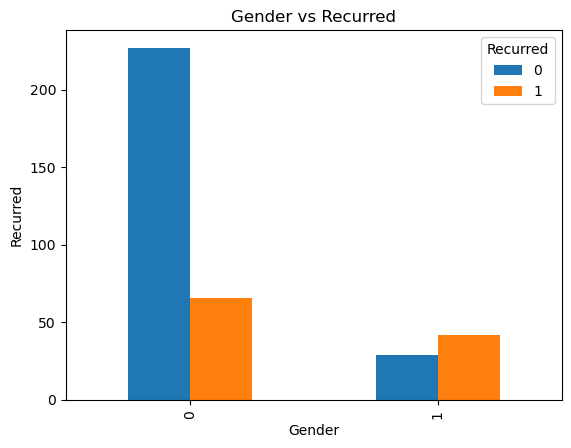

In [13]:
#import libraries for plotting 
import matplotlib.pyplot as plt
from pandas import DataFrame

#plotting of graduated parents vs. children using bar graph
pd.crosstab(df.Gender,df.Recurred).plot(kind='bar')
plt.title('Gender vs Recurred')
plt.xlabel('Gender')
plt.ylabel('Recurred')

#where: 0=no parents graduated, 1=1 parent graduated, 2=parents graduated

Text(0, 0.5, 'Recurred')

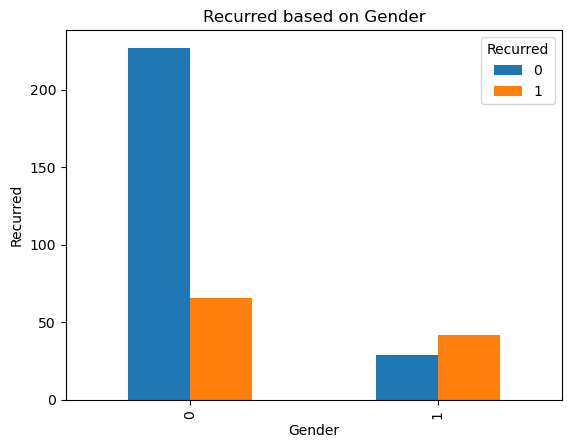

In [14]:
#import libraries for plotting 
import matplotlib.pyplot as plt
from pandas import DataFrame

#plotting of graduated based on gender using bar graph
pd.crosstab(df.Gender, df.Recurred).plot(kind='bar')
plt.title('Recurred based on Gender')
plt.xlabel('Gender')
plt.ylabel('Recurred')

#where: 0=female, 1=male

Text(0, 0.5, 'Recurred')

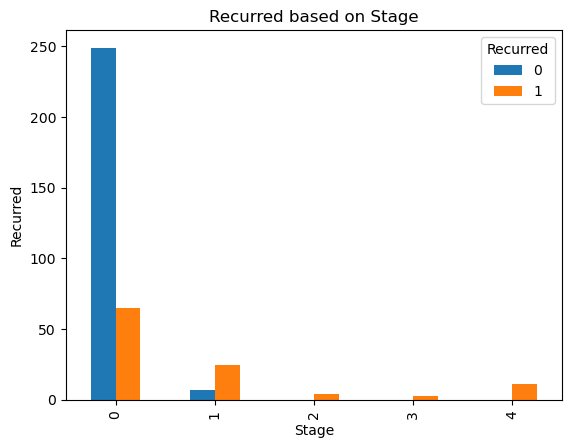

In [15]:
#import libraries for plotting 
import matplotlib.pyplot as plt
from pandas import DataFrame

#plotting of graduated based on income level using bar graph
pd.crosstab(df.Stage,df.Recurred).plot(kind='bar')
plt.title('Recurred based on Stage')
plt.xlabel('Stage')
plt.ylabel('Recurred')

#where: 0=below, 1=average, 2=above

Text(0, 0.5, 'Recurred')

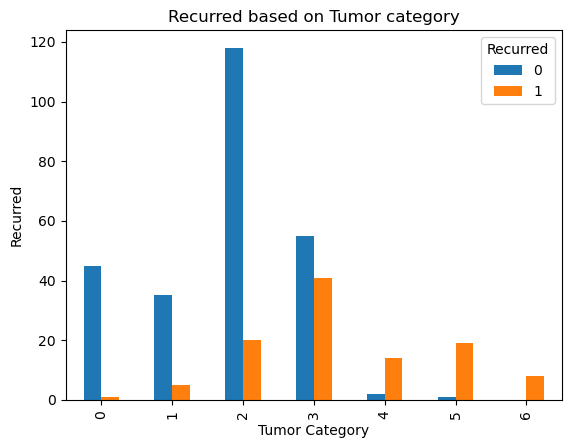

In [16]:
#import libraries for plotting 
import matplotlib.pyplot as plt
from pandas import DataFrame

#plotting of graduated based on no. of siblings using bar graph
pd.crosstab(df['T'], df.Recurred).plot(kind='bar')
plt.title('Recurred based on Tumor category')
plt.xlabel('Tumor Category')
plt.ylabel('Recurred')

### Model training

In [17]:
from sklearn.linear_model import LogisticRegression  #import library for logistic regression
logreg = LogisticRegression()  #build the logistic regression model
logreg.fit(X_train, y_train)  #fit the data into the model

LogisticRegression()

In [18]:
X_train.shape[1]  #check the dimension of x_train

16

In [19]:
X_train.columns  #check the columns of x_train

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'],
      dtype='object')

In [20]:
X_train.shape[0]  #display the 75% of the dataset in row

318

In [21]:
X_train  #display the values of 75% x_train dataset 

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
96,0.238806,0,0,0,0,2,3,3,1,1,2,2,0,0,0,2
59,0.417910,0,0,0,0,2,3,3,3,1,2,1,0,0,0,2
5,0.552239,1,1,0,0,2,1,3,2,0,2,0,0,0,0,2
48,0.164179,0,0,0,0,2,2,1,3,1,1,0,2,0,0,3
248,0.552239,0,1,0,0,2,3,0,1,0,2,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.104478,0,0,0,0,1,4,3,3,1,2,1,0,0,0,1
112,0.432836,0,0,0,0,2,3,3,3,1,2,2,0,0,0,1
289,0.179104,0,0,0,0,2,1,5,3,0,1,3,2,0,0,1
367,0.970149,1,1,0,0,2,3,3,1,0,1,5,0,0,1,3


In [22]:
y_train.shape[0]  #display the no. of rows in y_train

318

In [23]:
y_train  #display the values of 75% y_train dataset 

96     0
59     0
5      0
48     1
248    0
      ..
76     0
112    0
289    0
367    1
108    0
Name: Recurred, Length: 318, dtype: int64

In [24]:
X_test.shape[0]  #display the 25% of the dataset 

46

In [25]:
X_test.head()  #display the 25% dataset X_test data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
212,0.522388,0,0,0,0,2,4,5,3,1,1,2,2,0,0,2
34,0.552239,1,1,0,0,2,3,3,2,1,2,0,0,0,0,1
15,0.402985,0,0,0,0,2,4,3,2,1,2,0,0,0,0,2
366,0.731343,0,0,1,0,2,1,3,0,0,0,5,0,1,4,3
60,0.134328,1,0,0,0,2,3,3,3,1,2,1,0,0,0,1


In [26]:
y_test.shape[0]  #display the 25% of the dataset y_test data (actual data)

46

In [27]:
y_test.head()  #display the 25% dataset y_test data (actual data)

212    0
34     0
15     0
366    1
60     0
Name: Recurred, dtype: int64

In [28]:
y_pred=logreg.predict(X_test)  #make prediction - predicted value

In [29]:
y_pred  #display the predicted values of y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [30]:
#import libraries to check the accuracy measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)  #get the accuracy score
print('Accuracy: %f' % accuracy)  #display the accuracy score

precision = precision_score(y_test, y_pred)  #get the precision tp / (tp + fp)
print('Precision: %f' % precision)  #display the precision score

recall = recall_score(y_test, y_pred)  #get the recall tp / (tp + fn)
print('Recall: %f' % recall)  #display the recall score

f1 = f1_score(y_test, y_pred)  #f1: 2*R*P / R+P or 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % f1)  #display the f1 score

Accuracy: 0.913043
Precision: 0.846154
Recall: 0.846154
F1 score: 0.846154


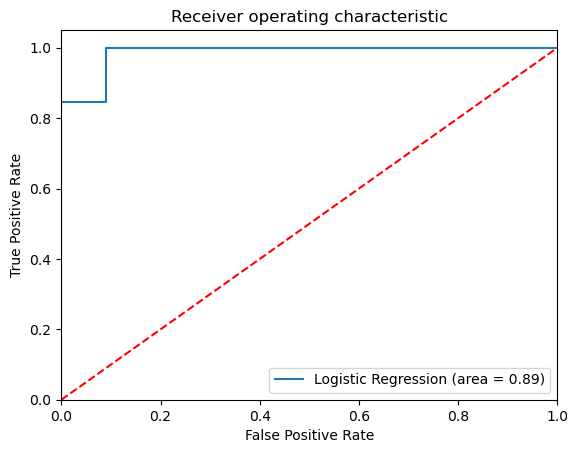

In [31]:
#import libraries to plot the probability of the graph curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#curve is another common tool used with binary classifiers
#the dotted line represents the ROC curve of a purely random classifier
#good classifier stays as far away from that line as possible (toward the top-left corner)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
#import libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

#make predictions and store data for later
y_pred_logreg = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_test,y_pred_logreg)*100,2)

In [33]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [34]:
#import libraries for SVM
from sklearn.svm import SVC

svm_classifier = SVC(C=100,kernel='linear',gamma=1)     
svm_classifier.fit(X_train,y_train)

#make predictions and store data for later
y_pred_svm = svm_classifier.predict(X_test)
acc_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)

In [35]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB() 
nb_classifier.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_nb = nb_classifier.predict(X_test)  
acc_nb = round(accuracy_score(y_test,y_pred_nb)*100,2)

In [36]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 
              'Support Vector Machine', 'Naive Bayes'],
    'Score': [acc_logreg, acc_dt, acc_svm, acc_nb]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
93.48,Support Vector Machine
93.48,Naive Bayes
91.30,Logistic Regression
91.30,Decision Tree


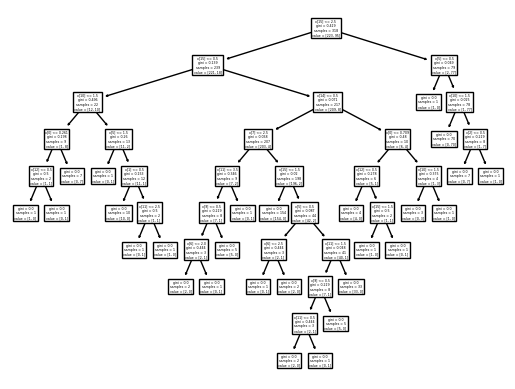

In [37]:
#import library to plot decision tree
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(dt_classifier);  #display decision tree

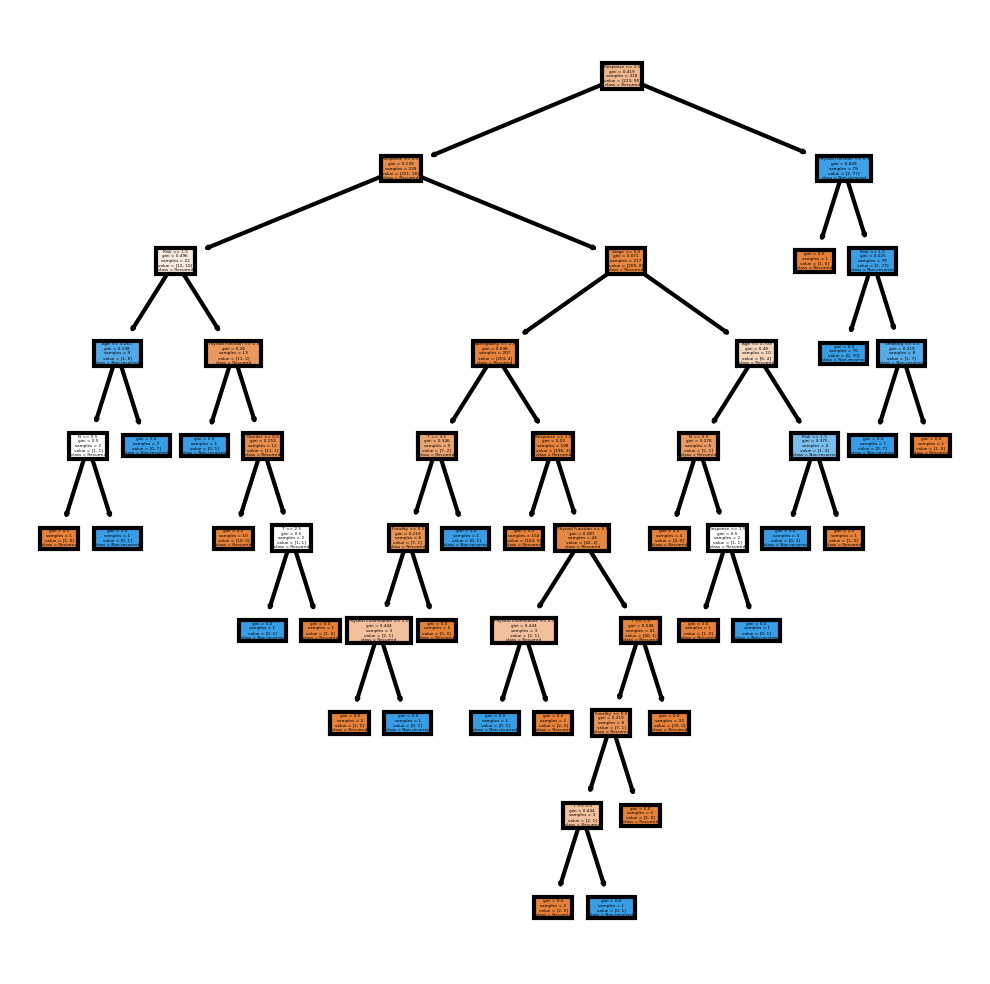

In [38]:
#add features and class name in the decision tree (dt_classifier)
fn= list(df.keys())[:-1]
cn=['Recurred', 'Non-recurred']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_classifier, feature_names = fn, class_names=cn,filled = True);

fig.savefig('dt_classifier_image.png')

In [42]:
#import libraries for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm) 
  
print ("Confusion Matrix : \n", cm)  #display the confusion matrix

Confusion Matrix : 
 [[31  2]
 [ 1 12]]


<Axes: xlabel='Predicted Values', ylabel='Actual Values'>

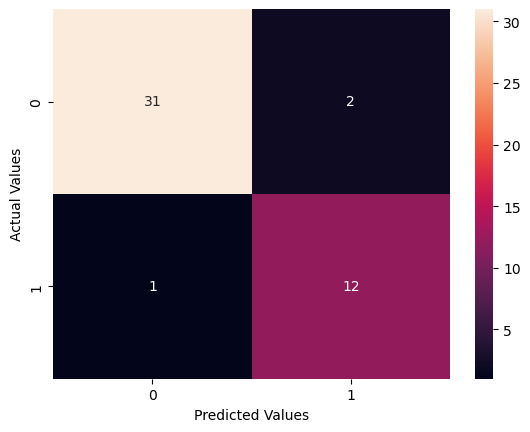

In [43]:
import seaborn as sns

#visualize the confusion matrix
cm = pd.crosstab(y_test, y_pred_svm, rownames=['Actual Values'], colnames=['Predicted Values'])
sns.heatmap(cm, annot=True)